<a href="https://colab.research.google.com/github/Hasanen99/ML-Homeworks-AIDOJO/blob/main/Assignment_7_Sequence_Modeling_Hasanen_A_Sahib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 07: Sequence Modeling

This Week's assignment is to train sequence models on the `Emoji Data` to classify the sentences emotion. You'll be creating models that takes in a sentence and predicts the appropriate emoji that describes the sentiment.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 07: Sequence Modeling - Zahraa Dhafer).

**DATASET**
The dataset consists of two csv files, a training file with 16k rows and a testing file with 2k rows, each row has 3 columns, the sentence, the emotion as text (meant to provide description to the emoji and not to be used in training/testing) and the emoji symbol (e.g. 😄, 😡, 😍).<br><br>
**Submission Deadline: Thursday, 3/3/2022 at 3:00 PM**

**Requirements:**
1. Set TensorFlow's random seed to 42.
2. Import all necessary libraries for the sequence modeling project.
3. Download the dataset (the link is provided below).
4. Read data from CSV files and split it into inputs and targets (no need to do train_test_split as the data is already split).
**Note**: Read both Train and Test files
5. Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64.
6. Do the appropriate operations on the targets to prepare them for training.
7. Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively.
8. Use Adam optimizer and the appropriate loss function and metrics to compile the model.
9. Use ModelCheckpoint callback to save the models at the epoch with the best validation accuracy, each model file should have your name (e.g. for Zahraa Dhafer, the model's file name would be "LSTM_Zahraa_D.h5). Make sure to download the model file as it will be a part of your assignment submission. <br>[ModelCheckpoint documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)
10. Plot the models metrics.




**HINTS:**
Set the new hyperparameters like vocabulary size, input length (i.e. max sequence length) in a separate cell after the import cell in your notebook (failing to do so will affect your style score)

**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>

[Assignment Colab File](https://colab.research.google.com/drive/129V6jlMgzfOWi033t7xIgdn0ZKRvnjP-?usp=sharing)<br>
[Dataset](https://drive.google.com/drive/folders/1i7LmIH7sJHSARAMXgznBqXZ82tzMhYiL?usp=sharing)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSff0OH5akQLPw7LArOYwXwVvJVHtQSgKGnfxlpI8OL-NBUrcg/viewform?usp=pp_url)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

# 1- Import all necessary libraries for the sequence modeling project

In [ ]:
# write your code below
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import metrics

%load_ext tensorboard

tf.random.set_seed(42)


# 2- Download the dataset

In [ ]:
Train_URL = 'https://drive.google.com/file/d/1peqmLNHwf5NUgBl_qibVixNHxxwQ69jk/view?usp=sharing'
Test_URL = 'https://drive.google.com/file/d/1v3xPVj9d9DmuusXFWFUtKiMPtIX6ffLt/view?usp=sharing'

path_1 = 'https://drive.google.com/uc?export=download&id='+Train_URL.split('/')[-2]
path_2 = 'https://drive.google.com/uc?export=download&id='+Test_URL.split('/')[-2]

Train_df = pd.read_csv(path_1)[['text','emoji']]
Test_df = pd.read_csv(path_2)[['text','emoji']]

Train_df

,text,emoji
0,i didnt feel humiliated,😢
1,i can go from feeling so hopeless to so damned...,😢
2,im grabbing a minute to post i feel greedy wrong,😡
3,i am ever feeling nostalgic about the fireplac...,😍
4,i am feeling grouchy,😡
...,...,...
15995,i just had a very brief time in the beanbag an...,😢
15996,i am now turning and i feel pathetic that i am...,😢
15997,i feel strong and good overall,😄
15998,i feel like this was such a rude comment and i...,😡


In [ ]:
Train_df

,text,emoji
0,i didnt feel humiliated,😢
1,i can go from feeling so hopeless to so damned...,😢
2,im grabbing a minute to post i feel greedy wrong,😡
3,i am ever feeling nostalgic about the fireplac...,😍
4,i am feeling grouchy,😡
...,...,...
15995,i just had a very brief time in the beanbag an...,😢
15996,i am now turning and i feel pathetic that i am...,😢
15997,i feel strong and good overall,😄
15998,i feel like this was such a rude comment and i...,😡


# 3- Read data from CSV files and split it into inputs and targets 

**Note**: no need to do train_test_split as the data is already split

In [ ]:
# write your code below
X_train=Train_df['text']
X_test=Test_df['text']

Y_train=Train_df['emoji']
Y_test=Test_df['emoji']

#4- Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64

In [ ]:
label=pd.Series(list(set(Y_train)))                             #find the unique emojis used
index_label=dict(label)                                         # create index_label dictionary and label_index dictionary
label_index=dict(zip(index_label.values(),index_label.keys()))
label_index

{'😄': 1, '😍': 2, '😡': 5, '😢': 4, '😨': 3, '😲': 0}

In [ ]:
# write your code below

vocab_size = 10000
embeddings_dims = 100
max_sequence= 64
Num_of_classes=len(label)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
  num_words = vocab_size,
  oov_token = '<OOV>'
)

tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)
X_train_tok[70]

[2, 24, 8, 393, 19, 1541, 2, 24, 117, 6, 7438, 1615, 30, 1388]

In [ ]:
X_train_padd = tf.keras.preprocessing.sequence.pad_sequences(
    X_train_tok,
    maxlen= max_sequence,
    padding='post',
    truncating='post'
)

X_test_padd = tf.keras.preprocessing.sequence.pad_sequences(
    X_test_tok,
    maxlen= max_sequence,
    padding='post',
    truncating='post'
)

In [ ]:
X_train_padd[70]

array([   2,   24,    8,  393,   19, 1541,    2,   24,  117,    6, 7438,
       1615,   30, 1388,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

#5- Do the appropriate operations on the targets to prepare them for training

In [ ]:
# write your code below

Y_train=Y_train.replace(label_index) #Convert each emoji to number in train and test data
Y_test=Y_test.replace(label_index)

In [ ]:
Y_train

0        4
1        4
2        5
3        2
4        5
        ..
15995    4
15996    4
15997    1
15998    5
15999    4
Name: emoji, Length: 16000, dtype: int64

In [ ]:
B_size=32 #var of the batch size

def pipeline(x, y, batch_size):
  data = tf.data.Dataset.from_tensor_slices((x,y))
  data = data.shuffle(1024)
  data = data.batch(batch_size)
  data = data.prefetch(tf.data.AUTOTUNE)
  return data

In [ ]:
Train_data=pipeline(X_train_padd,Y_train,B_size)
Test_data=pipeline(X_test_padd,Y_test,B_size)

In [ ]:
for x,y in Train_data.take(1):
  print(x[0],'\n\n',y[0])

tf.Tensor(
[  2   3 898   4 467   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0], shape=(64,), dtype=int32) 

 tf.Tensor(3, shape=(), dtype=int64)


#6- Modeling:
Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively

##DNN with Embedding layer

In [ ]:
# write your code below
DNN_with_E = tf.keras.Sequential([
                                 
  tf.keras.layers.Embedding(input_length=max_sequence,input_dim=vocab_size+1, output_dim=embeddings_dims, mask_zero=True),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform),
  tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform),
  tf.keras.layers.Dense(Num_of_classes, activation='softmax')
])

DNN_with_E.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)
DNN_with_E.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 64, 100)           1000100   
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               1638656   
                                                                 
 dense_31 (Dense)            (None, 128)               32896     
                                                                 
 dense_32 (Dense)            (None, 6)                 774       
                                                                 
Total params: 2,672,426
Trainable params: 2,672,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
log_dir = f"DNN_with_E/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
DNN_with_E.fit(Train_data,epochs=10,validation_data=Test_data,callbacks=[tensorboard_callback])

Epoch 1/10
500/500 [==============================] - 5s 9ms/step - loss: 1.0514 - accuracy: 0.6065 - val_loss: 0.4923 - val_accuracy: 0.8320
Epoch 2/10
500/500 [==============================] - 4s 8ms/step - loss: 0.2004 - accuracy: 0.9325 - val_loss: 0.5710 - val_accuracy: 0.8320
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 0.0453 - accuracy: 0.9866 - val_loss: 0.7121 - val_accuracy: 0.8235
Epoch 4/10
500/500 [==============================] - 4s 8ms/step - loss: 0.0228 - accuracy: 0.9941 - val_loss: 0.7443 - val_accuracy: 0.8375
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.7985 - val_accuracy: 0.8325
Epoch 6/10
500/500 [==============================] - 4s 8ms/step - loss: 0.0112 - accuracy: 0.9958 - val_loss: 0.8669 - val_accuracy: 0.8330
Epoch 7/10
500/500 [==============================] - 4s 9ms/step - loss: 0.0093 - accuracy: 0.9962 - val_loss: 0.9502 - val_accuracy: 0.8320
Epoch 

In [ ]:
%tensorboard --logdir DNN_with_E/fit

In [ ]:
yp_DNN_with_E=DNN_with_E.predict(Test_data)

##RNN

In [ ]:
# write your code below
rnn_model = tf.keras.Sequential([
                                 
  tf.keras.layers.Embedding(input_length=max_sequence,input_dim=vocab_size+1, output_dim=embeddings_dims, mask_zero=True),
  tf.keras.layers.SimpleRNN(100, activation='tanh'),
  tf.keras.layers.Dense(Num_of_classes, activation='softmax')
])

rnn_model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)
rnn_model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 64, 100)           1000100   
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               20100     
                                                                 
 dense_21 (Dense)            (None, 6)                 606       
                                                                 
Total params: 1,020,806
Trainable params: 1,020,806
Non-trainable params: 0
_________________________________________________________________


In [ ]:
log_dir = f"RNN/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# rnn_model.fit(X_train_padd,Y_train,epochs=10,validation_data=(X_test_padd,Y_test))
rnn_model.fit(Train_data,epochs=10,validation_data=Test_data,callbacks=[tensorboard_callback])

Epoch 1/10
500/500 [==============================] - 90s 174ms/step - loss: 1.3880 - accuracy: 0.4556 - val_loss: 0.8716 - val_accuracy: 0.7080
Epoch 2/10
500/500 [==============================] - 87s 174ms/step - loss: 0.5724 - accuracy: 0.8104 - val_loss: 0.5768 - val_accuracy: 0.8100
Epoch 3/10
500/500 [==============================] - 87s 174ms/step - loss: 0.2495 - accuracy: 0.9194 - val_loss: 0.5898 - val_accuracy: 0.8110
Epoch 4/10
500/500 [==============================] - 122s 245ms/step - loss: 0.1115 - accuracy: 0.9669 - val_loss: 0.6340 - val_accuracy: 0.8175
Epoch 5/10
500/500 [==============================] - 86s 171ms/step - loss: 0.0769 - accuracy: 0.9781 - val_loss: 0.7174 - val_accuracy: 0.8045
Epoch 6/10
500/500 [==============================] - 86s 172ms/step - loss: 0.0677 - accuracy: 0.9803 - val_loss: 0.8586 - val_accuracy: 0.7785
Epoch 7/10
500/500 [==============================] - 85s 169ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.9145 - val_a

In [ ]:
%tensorboard --logdir RNN/fit

In [ ]:
yp_RNN=rnn_model.predict(Test_data)

##LSTM

In [ ]:
LSTM_model = tf.keras.Sequential([
                                 
  tf.keras.layers.Embedding(input_length=max_sequence,input_dim=vocab_size+1, output_dim=embeddings_dims, mask_zero=True),
  tf.keras.layers.LSTM(100, activation='tanh'),
  tf.keras.layers.Dense(Num_of_classes, activation='softmax')
])

LSTM_model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)
LSTM_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 64, 100)           1000100   
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                                 
 dense_22 (Dense)            (None, 6)                 606       
                                                                 
Total params: 1,081,106
Trainable params: 1,081,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
log_dir = f"logs_LSTM/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
LSTM_model.fit(Train_data,epochs=10,validation_data=Test_data,callbacks=[tensorboard_callback])

Epoch 1/10
500/500 [==============================] - 20s 27ms/step - loss: 1.0613 - accuracy: 0.6108 - val_loss: 0.4362 - val_accuracy: 0.8710
Epoch 2/10
500/500 [==============================] - 11s 23ms/step - loss: 0.2644 - accuracy: 0.9124 - val_loss: 0.2704 - val_accuracy: 0.9060
Epoch 3/10
500/500 [==============================] - 12s 23ms/step - loss: 0.1255 - accuracy: 0.9560 - val_loss: 0.2214 - val_accuracy: 0.9200
Epoch 4/10
500/500 [==============================] - 11s 23ms/step - loss: 0.0832 - accuracy: 0.9707 - val_loss: 0.2411 - val_accuracy: 0.9180
Epoch 5/10
500/500 [==============================] - 11s 23ms/step - loss: 0.0577 - accuracy: 0.9800 - val_loss: 0.2526 - val_accuracy: 0.9170
Epoch 6/10
500/500 [==============================] - 11s 23ms/step - loss: 0.0448 - accuracy: 0.9844 - val_loss: 0.2811 - val_accuracy: 0.9120
Epoch 7/10
500/500 [==============================] - 11s 23ms/step - loss: 0.0504 - accuracy: 0.9821 - val_loss: 0.2536 - val_accuracy:

In [ ]:
%tensorboard --logdir logs_LSTM/fit

In [ ]:
yp_LSTM=LSTM_model.predict(Test_data)

##Double Layer LSTM 

In [ ]:
Double_LSTM_model = tf.keras.Sequential([
                                 
  tf.keras.layers.Embedding(input_length=max_sequence,input_dim=vocab_size+1, output_dim=embeddings_dims, mask_zero=True),
  tf.keras.layers.LSTM(256,return_sequences=True, activation='tanh'),
  tf.keras.layers.LSTM(128, activation='tanh'),
  tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform),
  # tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(Num_of_classes, activation='softmax')
])

Double_LSTM_model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)
Double_LSTM_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 64, 100)           1000100   
                                                                 
 lstm_10 (LSTM)              (None, 64, 256)           365568    
                                                                 
 lstm_11 (LSTM)              (None, 128)               197120    
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 6)                 390       
                                                                 
Total params: 1,571,434
Trainable params: 1,571,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
log_dir = f"Double_LSTM/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
Double_LSTM_model.fit(Train_data,epochs=10,validation_data=Test_data,callbacks=[tensorboard_callback])

Epoch 1/10
500/500 [==============================] - 37s 54ms/step - loss: 0.9886 - accuracy: 0.6061 - val_loss: 0.4272 - val_accuracy: 0.8575
Epoch 2/10
500/500 [==============================] - 24s 47ms/step - loss: 0.2522 - accuracy: 0.9137 - val_loss: 0.2285 - val_accuracy: 0.9160
Epoch 3/10
500/500 [==============================] - 24s 47ms/step - loss: 0.1352 - accuracy: 0.9453 - val_loss: 0.1900 - val_accuracy: 0.9200
Epoch 4/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0901 - accuracy: 0.9622 - val_loss: 0.1975 - val_accuracy: 0.9155
Epoch 5/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0732 - accuracy: 0.9704 - val_loss: 0.2221 - val_accuracy: 0.9215
Epoch 6/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0623 - accuracy: 0.9756 - val_loss: 0.2184 - val_accuracy: 0.9210
Epoch 7/10
500/500 [==============================] - 24s 47ms/step - loss: 0.0485 - accuracy: 0.9819 - val_loss: 0.2591 - val_accuracy:

In [ ]:
%tensorboard --logdir Double_LSTM/fit

In [ ]:
yp_Double_LSTM=Double_LSTM_model.predict(Test_data)

In [ ]:
!kill 1338

##GRU

In [ ]:
GRU_model = tf.keras.Sequential([
                                 
  tf.keras.layers.Embedding(input_length=max_sequence,input_dim=vocab_size+1, output_dim=embeddings_dims, mask_zero=True),
  tf.keras.layers.GRU(256, activation='tanh',return_sequences=True),
  tf.keras.layers.GRU(128, activation='tanh'),
  tf.keras.layers.Dense(64, activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.HeUniform),
  
  tf.keras.layers.Dense(Num_of_classes, activation='softmax')
])

GRU_model.compile(
    optimizer=tf.optimizers.Adam(), 
    loss=tf.losses.SparseCategoricalCrossentropy(),
    metrics =['accuracy']
)
GRU_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 64, 100)           1000100   
                                                                 
 gru_12 (GRU)                (None, 64, 256)           274944    
                                                                 
 gru_13 (GRU)                (None, 128)               148224    
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 6)                 390       
                                                                 
Total params: 1,431,914
Trainable params: 1,431,914
Non-trainable params: 0
_________________________________________________________________


In [ ]:
log_dir = f"GRU/fit/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
GRU_model.fit(Train_data,epochs=10,validation_data=Test_data,callbacks=[tensorboard_callback])

Epoch 1/10
500/500 [==============================] - 32s 46ms/step - loss: 0.8071 - accuracy: 0.6919 - val_loss: 0.2223 - val_accuracy: 0.9175
Epoch 2/10
500/500 [==============================] - 20s 40ms/step - loss: 0.1564 - accuracy: 0.9354 - val_loss: 0.1586 - val_accuracy: 0.9280
Epoch 3/10
500/500 [==============================] - 20s 40ms/step - loss: 0.1015 - accuracy: 0.9538 - val_loss: 0.1832 - val_accuracy: 0.9225
Epoch 4/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0850 - accuracy: 0.9618 - val_loss: 0.2012 - val_accuracy: 0.9270
Epoch 5/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0710 - accuracy: 0.9697 - val_loss: 0.2020 - val_accuracy: 0.9235
Epoch 6/10
500/500 [==============================] - 20s 41ms/step - loss: 0.0587 - accuracy: 0.9776 - val_loss: 0.2306 - val_accuracy: 0.9220
Epoch 7/10
500/500 [==============================] - 20s 40ms/step - loss: 0.0468 - accuracy: 0.9822 - val_loss: 0.2831 - val_accuracy:

In [ ]:
%tensorboard --logdir GRU/fit

In [ ]:
yp_GRU=GRU_model.predict(Test_data)

simple test

In [ ]:
np.argmax(rnn_model.predict(tf.expand_dims(X_test_padd[68], axis=0)))

0

In [ ]:
Y_test[68]

0

In [ ]:
np.argmax(yp_RNN,axis=1)

array([1, 5, 0, ..., 3, 0, 2])

## Plot the models metrics

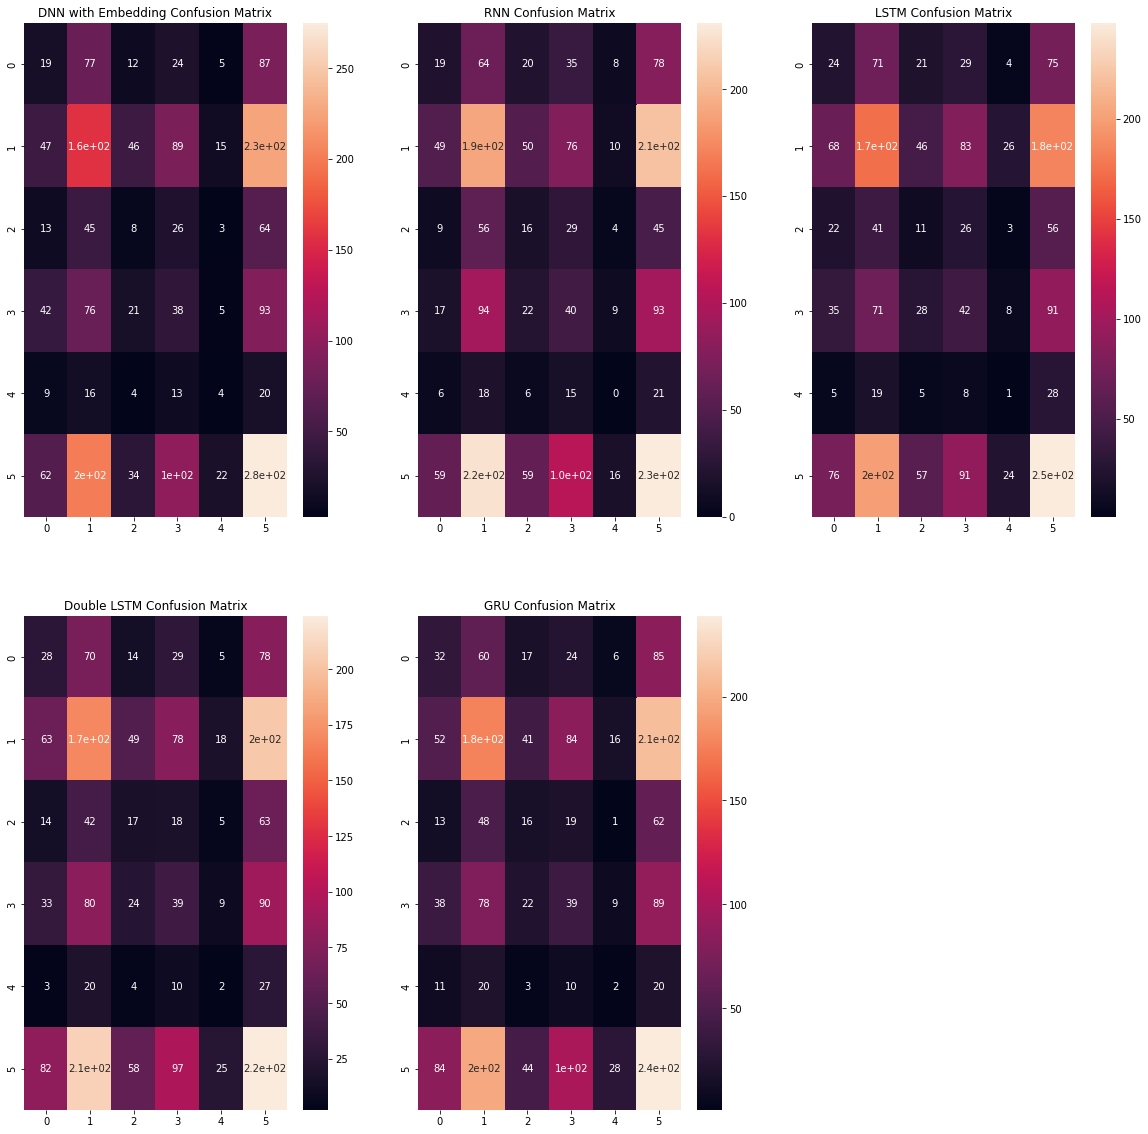

In [ ]:
# write your code below
# evaluate the model


plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.title('DNN with Embedding Confusion Matrix')
CM1=metrics.confusion_matrix(Y_test, np.argmax(yp_DNN_with_E,axis=1))  
sns.heatmap(CM1, annot=True)

plt.subplot(2,3,2)
plt.title('RNN Confusion Matrix')
CM2=metrics.confusion_matrix(Y_test,np.argmax(yp_RNN,axis=1))  
sns.heatmap(CM2, annot=True)

plt.subplot(2,3,3)
plt.title('LSTM Confusion Matrix')
CM3=metrics.confusion_matrix(Y_test,np.argmax(yp_LSTM,axis=1))  
sns.heatmap(CM3, annot=True)

plt.subplot(2,3,4)
plt.title('Double LSTM Confusion Matrix')
CM4=metrics.confusion_matrix(Y_test, np.argmax(yp_Double_LSTM,axis=1))  
sns.heatmap(CM4, annot=True)

plt.subplot(2,3,5)
plt.title('GRU Confusion Matrix')
CM5=metrics.confusion_matrix(Y_test,np.argmax(yp_GRU,axis=1))  
sns.heatmap(CM5, annot=True)

In [ ]:
Allms={'Accuracy':[DNN_with_E.evaluate(X_test_padd,Y_test,verbose=0)[1],rnn_model.evaluate(X_test_padd,Y_test,verbose=0)[1],LSTM_model.evaluate(X_test_padd,Y_test,verbose=0)[1],Double_LSTM_model.evaluate(X_test_padd,Y_test,verbose=0)[1],GRU_model.evaluate(X_test_padd,Y_test,verbose=0)[1]],
       'F1-macro':[metrics.f1_score(Y_test,np.argmax(yp_DNN_with_E,axis=1),average='macro'),metrics.f1_score(Y_test,np.argmax(yp_RNN,axis=1),average='macro'),metrics.f1_score(Y_test,np.argmax(yp_LSTM,axis=1),average='macro'),metrics.f1_score(Y_test,np.argmax(yp_Double_LSTM,axis=1),average='macro'),metrics.f1_score(Y_test,np.argmax(yp_GRU,axis=1),average='macro')],
       'F1-micro':[metrics.f1_score(Y_test,np.argmax(yp_DNN_with_E,axis=1),average='micro'),metrics.f1_score(Y_test,np.argmax(yp_RNN,axis=1),average='micro'),metrics.f1_score(Y_test,np.argmax(yp_LSTM,axis=1),average='micro'),metrics.f1_score(Y_test,np.argmax(yp_Double_LSTM,axis=1),average='micro'),metrics.f1_score(Y_test,np.argmax(yp_GRU,axis=1),average='micro')],
       'F1-weighted':[metrics.f1_score(Y_test,np.argmax(yp_DNN_with_E,axis=1),average='weighted'),metrics.f1_score(Y_test,np.argmax(yp_RNN,axis=1),average='weighted'),metrics.f1_score(Y_test,np.argmax(yp_LSTM,axis=1),average='weighted'),metrics.f1_score(Y_test,np.argmax(yp_Double_LSTM,axis=1),average='weighted'),metrics.f1_score(Y_test,np.argmax(yp_GRU,axis=1),average='weighted')]
       }

Met_DF=pd.DataFrame(Allms,index=['DNN with Embedding','RNN','LSTM','Double LSTM','GRU'])
Met_DF

,Accuracy,F1-macro,F1-micro,F1-weighted
DNN with Embedding,0.8195,0.166528,0.2510,0.245828
RNN,0.7810,0.163609,0.2480,0.245071
LSTM,0.9145,0.166548,0.2495,0.250642
Double LSTM,0.9225,0.169428,0.2395,0.239587
GRU,0.9155,0.177509,0.2525,0.251659


##Results
Based on the accuracy and F1 score, sketches of tuning with tensorboard, supported by its cofusion matrix, the best model is the **Double LSTM**.